<a href="https://colab.research.google.com/github/KatyayaniPande/SC1015/blob/main/dsai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement


Predicting the salaries for data science job postings is a complex task, as there are numerous factors that can influence the salary range for a given job title and location. However, by analyzing a large dataset of job postings and salaries, we can develop a model that accurately predicts the salary range for a job posting based on the features of the job title, location, industry, and other relevant factors.

Specifically, we aim to analyse the salaries in the data science industry. We will use a combination of machine learning algorithms and statistical techniques to preprocess and transform the data, identify the most important features, and train a model that accurately predicts the salary range for job postings.

To evaluate the performance of our model, we will use various metrics such as mean absolute error, mean squared error, and R-squared value. Additionally, we will visualize the results of our analysis using interactive dashboards and data visualization tools to provide insights into the key factors that drive data science salaries in the United States. Ultimately, our goal is to provide a valuable resource for job seekers, employers, and researchers who want to understand the job market for data science roles and optimize their hiring and recruiting strategies.

# Importing Libraries


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
#The library below will be used to converty country names from ISO codes later on
!pip install country-converter
import country_converter as coco

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 KB 2.5 MB/s eta 0:00:00


In [ ]:
#importing adn raeding conetnts of salaries file
from google.colab import files
uploaded = files.upload()
salaries_df = pd.read_csv("ds_salaries.csv", index_col=0)


Saving ds_salaries.csv to ds_salaries (1).csv


In [ ]:
#
num_rows, num_cols = salaries_df.shape
print(f'Number of rows: {num_rows}\nNumber of columns: {num_cols}')

Number of rows: 607
Number of columns: 11


# Data Preparation and Data Cleaning

In [ ]:
# Renaming Data Columns to make it easier to understand

#Experience Level
experience_level_dict={'EN':'Entry-level / Junior',
                       'MI':'Mid-level / Intermediate',
                       'SE':'Senior-level / Expert',
                       'EX':'Executive-level / Director'
                      }
salaries_df['experience_level']=salaries_df['experience_level'].map(experience_level_dict)

# Employment Type
employment_type_dict = {'FT':'Full Time',
                        'PT':'Part Time',
                        'CT':'Contract',
                        'FL':'Freelance'}
salaries_df['employment_type'] = salaries_df['employment_type'].map(employment_type_dict)

# Remote_ratio
salaries_df.remote_ratio.replace([100,50,0],['Fully Remote','Partially Remote','On-site'], inplace=True)
salaries_df['remote_ratio']=salaries_df['remote_ratio'].astype(object)

#Employee Residence & Company location (using ISO code)
#We are grouping each of the countries by its accronym so it is easier 
ISO3166 = {'AD': 'Andorra','AE': 'United Arab Emirates','AF': 'Afghanistan','AG': 'Antigua & Barbuda','AI': 'Anguilla',
           'AL': 'Albania','AM': 'Armenia','AN': 'Netherlands Antilles','AO': 'Angola','AQ': 'Antarctica','AR': 'Argentina',
           'AS': 'American Samoa','AT': 'Austria','AU': 'Australia','AW': 'Aruba','AZ': 'Azerbaijan','BA': 'Bosnia and Herzegovina',
           'BB': 'Barbados','BD': 'Bangladesh','BE': 'Belgium','BF': 'Burkina Faso','BG': 'Bulgaria','BH': 'Bahrain','BI': 'Burundi',
           'BJ': 'Benin','BM': 'Bermuda','BN': 'Brunei Darussalam','BO': 'Bolivia','BR': 'Brazil','BS': 'Bahama','BT': 'Bhutan',
           'BU': 'Burma (no longer exists)','BV': 'Bouvet Island','BW': 'Botswana','BY': 'Belarus','BZ': 'Belize','CA': 'Canada',
           'CC': 'Cocos (Keeling) Islands','CF': 'Central African Republic','CG': 'Congo','CH': 'Switzerland','CI': 'Côte D\'ivoire (Ivory Coast)',
           'CK': 'Cook Iislands','CL': 'Chile','CM': 'Cameroon','CN': 'China','CO': 'Colombia','CR': 'Costa Rica','CS': 'Czechoslovakia (no longer exists)',
           'CU': 'Cuba','CV': 'Cape Verde','CX': 'Christmas Island','CY': 'Cyprus','CZ': 'Czech Republic','DD': 'German Democratic Republic (no longer exists)',
           'DE': 'Germany','DJ': 'Djibouti','DK': 'Denmark','DM': 'Dominica','DO': 'Dominican Republic','DZ': 'Algeria','EC': 'Ecuador',
           'EE': 'Estonia','EG': 'Egypt','EH': 'Western Sahara','ER': 'Eritrea','ES': 'Spain','ET': 'Ethiopia','FI': 'Finland','FJ': 'Fiji',
           'FK': 'Falkland Islands (Malvinas)','FM': 'Micronesia','FO': 'Faroe Islands','FR': 'France','FX': 'France, Metropolitan','GA': 'Gabon',
           'GB': 'United Kingdom (Great Britain)','GD': 'Grenada','GE': 'Georgia','GF': 'French Guiana','GH': 'Ghana','GI': 'Gibraltar',
           'GL': 'Greenland','GM': 'Gambia','GN': 'Guinea','GP': 'Guadeloupe','GQ': 'Equatorial Guinea','GR': 'Greece','GS': 'South Georgia and the South Sandwich Islands',
           'GT': 'Guatemala','GU': 'Guam','GW': 'Guinea-Bissau','GY': 'Guyana','HK': 'Hong Kong','HM': 'Heard & McDonald Islands','HN': 'Honduras',
           'HR': 'Croatia','HT': 'Haiti','HU': 'Hungary','ID': 'Indonesia','IE': 'Ireland','IL': 'Israel','IN': 'India','IO': 'British Indian Ocean Territory',
           'IQ': 'Iraq','IR': 'Islamic Republic of Iran','IS': 'Iceland','IT': 'Italy','JM': 'Jamaica','JO': 'Jordan','JP': 'Japan','KE': 'Kenya',
           'KG': 'Kyrgyzstan','KH': 'Cambodia','KI': 'Kiribati','KM': 'Comoros','KN': 'St. Kitts and Nevis','KP': 'Korea, Democratic People\'s Republic of',
           'KR': 'Korea, Republic of','KW': 'Kuwait','KY': 'Cayman Islands','KZ': 'Kazakhstan','LA': 'Lao People\'s Democratic Republic','LB': 'Lebanon',
           'LC': 'Saint Lucia','LI': 'Liechtenstein','LK': 'Sri Lanka','LR': 'Liberia','LS': 'Lesotho','LT': 'Lithuania','LU': 'Luxembourg','LV': 'Latvia',
           'LY': 'Libyan Arab Jamahiriya','MA': 'Morocco','MC': 'Monaco','MD': 'Moldova, Republic of','MG': 'Madagascar','MH': 'Marshall Islands','ML': 'Mali',
           'MN': 'Mongolia','MM': 'Myanmar','MO': 'Macau','MP': 'Northern Mariana Islands','MQ': 'Martinique','MR': 'Mauritania','MS': 'Monserrat','MT': 'Malta',
           'MU': 'Mauritius','MV': 'Maldives','MW': 'Malawi','MX': 'Mexico','MY': 'Malaysia','MZ': 'Mozambique','NA': 'Namibia','NC': 'New Caledonia','NE': 'Niger',
           'NF': 'Norfolk Island','NG': 'Nigeria','NI': 'Nicaragua','NL': 'Netherlands','NO': 'Norway','NP': 'Nepal','NR': 'Nauru','NT': 'Neutral Zone (no longer exists)',
           'NU': 'Niue','NZ': 'New Zealand','OM': 'Oman','PA': 'Panama','PE': 'Peru','PF': 'French Polynesia','PG': 'Papua New Guinea','PH': 'Philippines','PK': 'Pakistan',
           'PL': 'Poland','PM': 'St. Pierre & Miquelon','PN': 'Pitcairn','PR': 'Puerto Rico','PT': 'Portugal','PW': 'Palau','PY': 'Paraguay','QA': 'Qatar','RE': 'Réunion',
           'RO': 'Romania','RU': 'Russian Federation','RW': 'Rwanda','SA': 'Saudi Arabia','SB': 'Solomon Islands','SC': 'Seychelles','SD': 'Sudan','SE': 'Sweden',
           'SG': 'Singapore','SH': 'St. Helena','SI': 'Slovenia','SJ': 'Svalbard & Jan Mayen Islands','SK': 'Slovakia','SL': 'Sierra Leone','SM': 'San Marino',
           'SN': 'Senegal','SO': 'Somalia','SR': 'Suriname','ST': 'Sao Tome & Principe','SU': 'Union of Soviet Socialist Republics (no longer exists)',
           'SV': 'El Salvador','SY': 'Syrian Arab Republic','SZ': 'Swaziland','TC': 'Turks & Caicos Islands','TD': 'Chad','TF': 'French Southern Territories',
           'TG': 'Togo','TH': 'Thailand','TJ': 'Tajikistan','TK': 'Tokelau','TM': 'Turkmenistan','TN': 'Tunisia','TO': 'Tonga','TP': 'East Timor',
           'TR': 'Turkey','TT': 'Trinidad & Tobago','TV': 'Tuvalu','TW': 'Taiwan, Province of China','TZ': 'Tanzania, United Republic of','UA': 'Ukraine',
           'UG': 'Uganda','UM': 'United States Minor Outlying Islands','US': 'United States of America','UY': 'Uruguay','UZ': 'Uzbekistan',
           'VA': 'Vatican City State (Holy See)','VC': 'St. Vincent & the Grenadines','VE': 'Venezuela','VG': 'British Virgin Islands',
           'VI': 'United States Virgin Islands','VN': 'Viet Nam','VU': 'Vanuatu','WF': 'Wallis & Futuna Islands','WS': 'Samoa','YD': 'Democratic Yemen (no longer exists)',
           'YE': 'Yemen','YT': 'Mayotte','YU': 'Yugoslavia','ZA': 'South Africa','ZM': 'Zambia','ZR': 'Zaire','ZW': 'Zimbabwe','ZZ': 'Unknown or unspecified country',
}

salaries_df['employee_residence'] = salaries_df['employee_residence'].map(ISO3166)
salaries_df['company_location'] = salaries_df['company_location'].map(ISO3166)

#Company Size
company_size_dict={'S': 'Small',
                  'M':'Medium',
                  'L':'Large'}
salaries_df.company_size=salaries_df['company_size'].map(company_size_dict)

In [ ]:
#Reclassifying and mapping data points
employment_classification = {'Data Scientist':'Data Scientist',
                             'Principal Data Scientist':'Data Scientist',
                             'Applied Data Scientist':'Data Scientist',
                             'Data Science Manager':'Data Scientist',
                             'Head of Data Science':'Data Scientist',
                             'Director of Data Science':'Data Scientist',
                             'Staff Data Scientist':'Data Scientist',
                             'Data Science Consultant':'Data Scientist',
                             'Data Science Engineer':'Data Scientist',
                             'Head of Data':'Data Scientist',
                             'Lead Data Scientist':'Data Scientist',
                             'Data Scientist Lead':'Data Scientist',
                             'Data Science Lead':'Data Scientist',
                             'Product Data Scientist':'Data Scientist',
                             'Data Specialist':'Data Scientist',
                             
                             'Big Data Engineer':'Data Engineer',
                             'Data Engineer':'Data Engineer',
                             'Principal Data Engineer':'Data Engineer',
                             'Data Operations Engineer':'Data Engineer',
                             'Lead Data Engineer':'Data Engineer',
                             'Director of Data Engineering':'Data Engineer',
                             'Research Engineer':'Data Engineer',
                             'Data Engineering Manager':'Data Engineer',
                             'Cloud Data Engineer':'Data Engineer',
                             'Data Science Tech Lead':'Data Engineer',
                             'Data Manager':'Data Engineer',
                             'ETL Developer':'Data Engineer',

                             'Product Data Analyst':'Data Analyst',
                             'Data Analyst':'Data Analyst',
                             'Business Data Analyst':'Data Analyst',
                             'Data Science Consultant':'Data Analyst',
                             'BI Data Analyst':'Data Analyst',
                             'BI Analyst':'Data Analyst',
                             'Lead Data Analyst':'Data Analyst',
                             'Data Analytics Engineer':'Data Analyst',
                             'Marketing Data Analyst':'Data Analyst',
                             'Financial Data Analyst':'Data Analyst',
                             'Finance Data Analyst':'Data Analyst',
                             'Principal Data Analyst':'Data Analyst',
                             'Data Analytics Manager':'Data Analyst',
                             'Data Analytics Lead':'Data Analyst',
                             'Analytics Engineer':'Data Analyst',
                             'Data Operations Analyst':'Data Analyst',
                             'Data Analytics Consultant':'Data Analyst',
                             'Power BI Developer':'Data Analyst',
                             
                             'Machine Learning Scientist':'Machine Learning Scientist',
                             'Applied Machine Learning Scientist':'Machine Learning Scientist',
                             'Machine Learning Research Engineer':'Machine Learning Scientist',
                             'Head of Machine Learning':'Machine Learning Scientist',
                             'Machine Learning Manager':'Machine Learning Scientist',
                             
                             'Machine Learning Infrastructure Engineer':'Machine Learning Engineer',
                             'Machine Learning Engineer':'Machine Learning Engineer',
                             'ML Engineer':'Machine Learning Engineer',
                             'Lead Machine Learning Engineer':'Machine Learning Engineer',
                             'Machine Learning Developer':'Machine Learning Engineer',
                             
                             'Data Architect':'Data Architect',
                             'Cloud Data Architect':'Data Architect',
                             'Principal Data Architect':'Data Architect',
                             'Big Data Architect':'Data Architect',
                             
                             'Computer Vision Engineer':'Computer Vision Engineer',
                             'Computer Vision Software Engineer':'Computer Vision Engineer',
                             '3D Computer Vision Researcher':'Computer Vision Engineer',
                             
                             'NLP Engineer':'NLP Engineer',
                             'AI Scientist':'AI Scientist',
                             'Research Scientist':'Research Scientist',
                             'Applied Scientist':'Applied Scientist',
                            }

salaries_df["job_title"] = salaries_df["job_title"].map(employment_classification)

# Salaries Analysis

In [ ]:
#Check datattypes of each column present in our data file
salaries_df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio          object
company_location      object
company_size          object
dtype: object

## Salary and Work Year

In [ ]:
missing_ratio = salaries_df.select_dtypes(include=['float64','int64']).isnull().sum()
missing_ratio = missing_ratio / num_rows
columns=list(missing_ratio.index)
values=list(missing_ratio.values)
missing_ratio_df={columns[i]:values[i] for i in range(len(columns))}
missing_ratio_df['']=['missing_ratio']
missing_ratio_df=pd.DataFrame(missing_ratio_df).set_index('')

In [ ]:
salary_timeline = pd.DataFrame(salaries_df.groupby("work_year")["salary_in_usd"].mean())
salary_timeline = salary_timeline.reset_index()
salary_timeline.rename(columns = {'salary_in_usd':'mean_salary_in_usd'}, inplace = True)
salary_timeline["work_year"].replace({2020:"2020",2021:"2021",2022:"2022"},inplace=True)
print(f"Let's take a look at the dataframe that contains the data needed for this question: ")
salary_timeline

Let's take a look at the dataframe that contains the data needed for this question: 


,work_year,mean_salary_in_usd
0,2020,95813.000000
1,2021,99853.792627
2,2022,124522.006289


Let's take a look at the change over time of average salary:


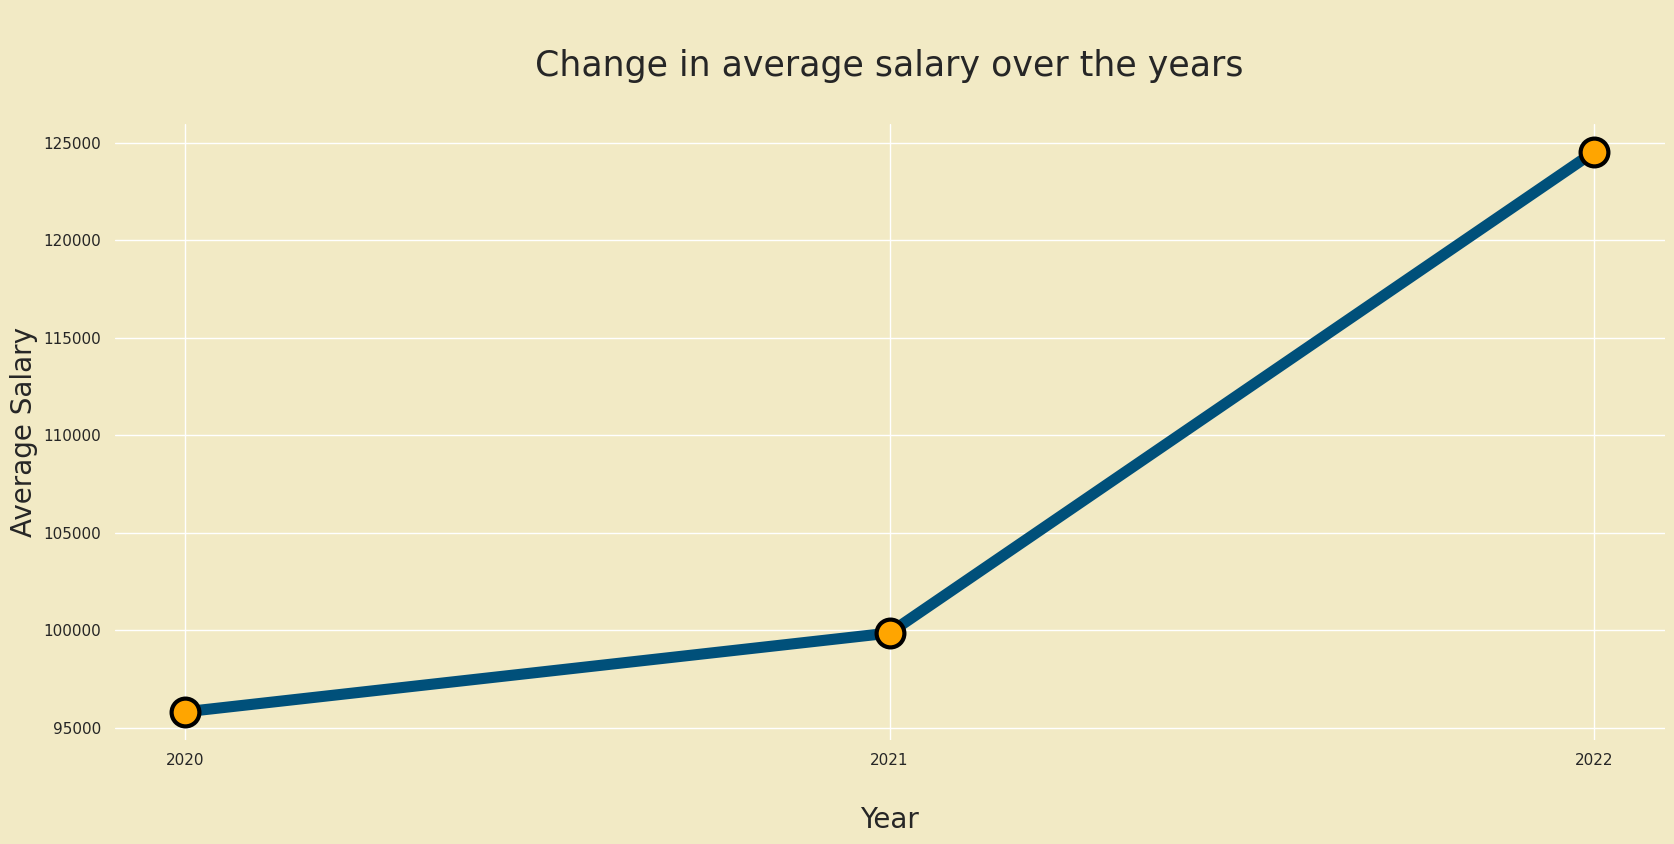

In [ ]:
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
palette = ["#11264e","#00507A","#026e90","#008b99","#6faea4","#fcdcb0","#FEE08B","#faa96e","#f36b3b","#ef3f28","#CC0028"]
print(f"Let's take a look at the change over time of average salary:")
plt.subplots(figsize=(20,8))

p=sns.lineplot(x=salary_timeline["work_year"] ,y=salary_timeline["mean_salary_in_usd"],data=salary_timeline,color=palette[1],marker="o",linewidth=8,markersize=20,markerfacecolor="orange",markeredgecolor="black",markeredgewidth=3)
p.axes.set_title("\nChange in average salary over the years\n",fontsize=25)
p.axes.set_xlabel("\nYear",fontsize=20)
p.axes.set_ylabel("Average Salary",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

## Salary and Company Size

Let's take a look at average wages across types of employees by company sizes:


<ipython-input-35-1b78b2ca80e7>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  p = sns.barplot(data=salaries_df, x='company_size', y='salary_in_usd', hue='employment_type', ci=None)


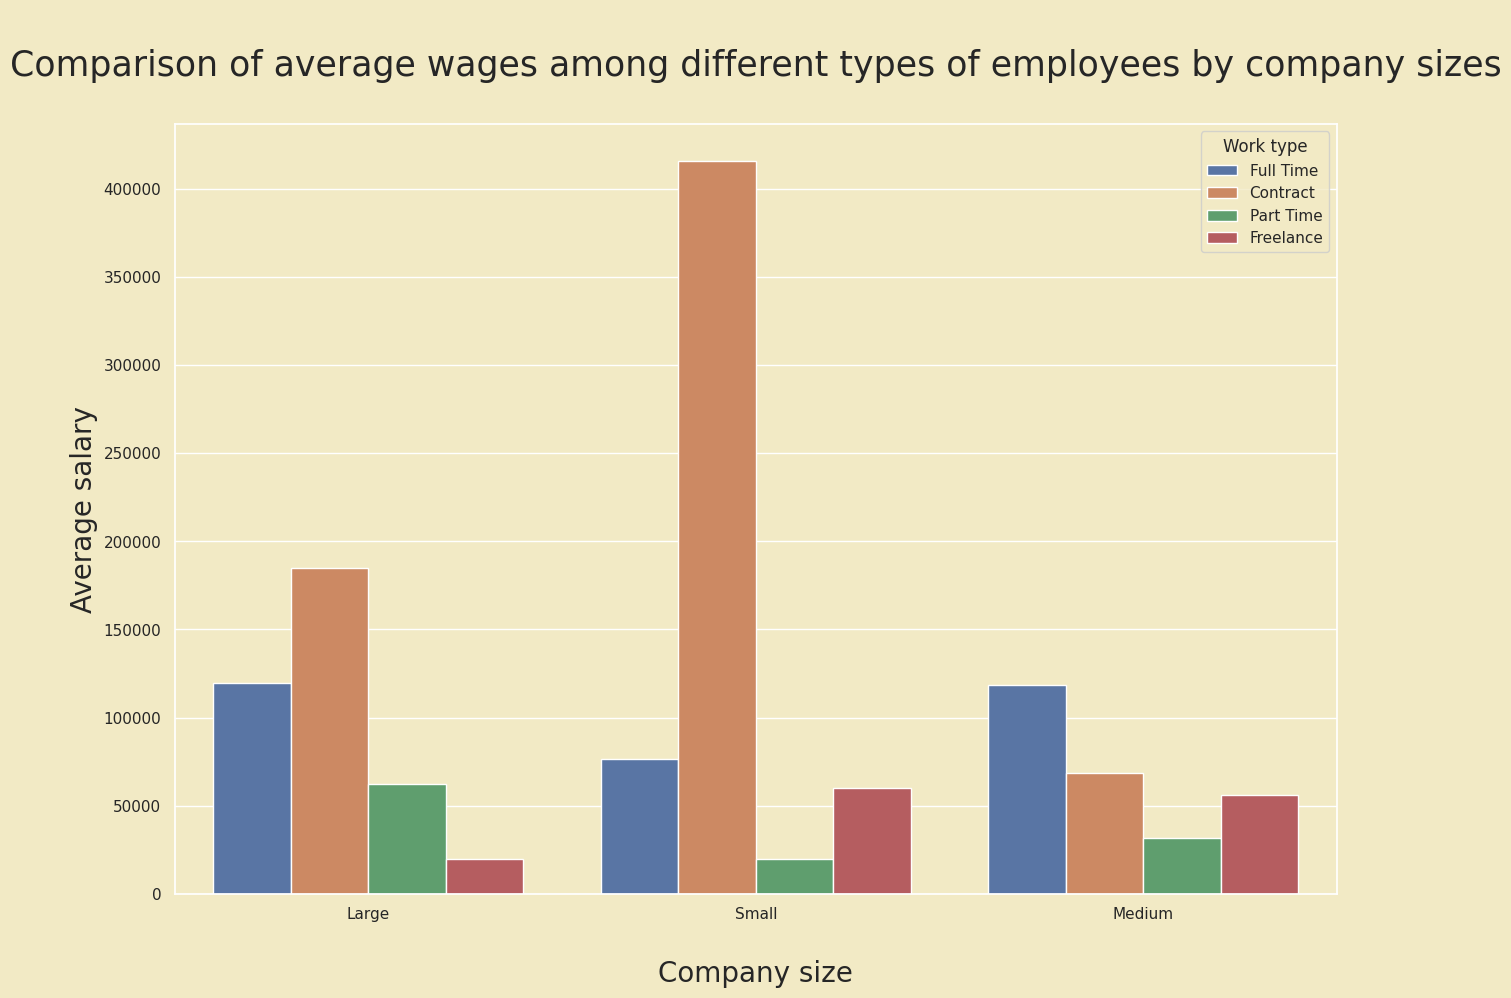

In [ ]:
print(f"Let's take a look at average wages across types of employees by company sizes:")
plt.subplots(figsize=(15, 10))
p = sns.barplot(data=salaries_df, x='company_size', y='salary_in_usd', hue='employment_type', ci=None)
p.set_title('\nComparison of average wages among different types of employees by company sizes\n', fontsize=25)
p.set_xlabel('\nCompany size', fontsize=20)
p.set_ylabel('Average salary', fontsize=20)
plt.legend(title='Work type')
plt.show()

## Salary and Experience Level


In [ ]:
year_salary=salaries_df.groupby(["work_year","experience_level"])["salary_in_usd"].mean()
year_salary=year_salary.reset_index()
year_salary

,work_year,experience_level,salary_in_usd
0,2020,Entry-level / Junior,63648.600000
1,2020,Executive-level / Director,202416.500000
2,2020,Mid-level / Intermediate,85950.062500
3,2020,Senior-level / Expert,137240.500000
4,2021,Entry-level / Junior,59101.021277
5,2021,Executive-level / Director,223752.727273
6,2021,Mid-level / Intermediate,85490.088889
7,2021,Senior-level / Expert,126596.188406
8,2022,Entry-level / Junior,65423.428571
9,2022,Executive-level / Director,178313.846154


## Salary and Job Titles

In [ ]:
role_salary = salaries_df.groupby(["work_year","job_title"], as_index=False)['salary_in_usd'].mean()
role_salary = role_salary.sort_values('salary_in_usd', ascending=False)
role_salary

,work_year,job_title,salary_in_usd
48,2021,Financial Data Analyst,450000.000000
74,2022,Data Analytics Lead,405000.000000
61,2021,Principal Data Engineer,328333.333333
11,2020,Director of Data Science,325000.000000
19,2020,Machine Learning Scientist,260000.000000
...,...,...,...
89,2022,ML Engineer,21983.000000
73,2022,Data Analytics Engineer,20000.000000
15,2020,ML Engineer,15966.000000
21,2020,Product Data Analyst,13036.000000


In [ ]:
fig=px.bar(role_salary, x='job_title',y='salary_in_usd',color='job_title',
    labels={'job_title':'Job Title','salary_in_usd':'Salary $'},
    title='Highest Paying Roles in Data Science')
fig.show()

## Overall Salary Analysis

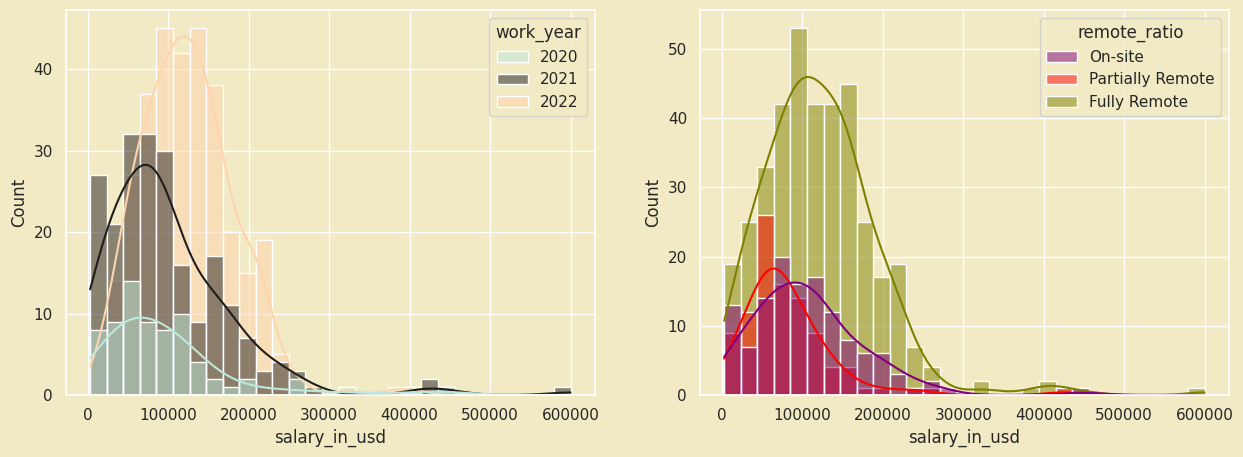

In [ ]:
figure,axis=plt.subplots(ncols=2,nrows=1,figsize=(15,5))
sns.histplot(data=salaries_df, x="salary_in_usd",kde=True,hue='work_year',ax=axis[0],palette="icefire")
sns.histplot(data=salaries_df, x="salary_in_usd",kde=True,hue='remote_ratio',ax=axis[1],palette="brg")
plt.show()

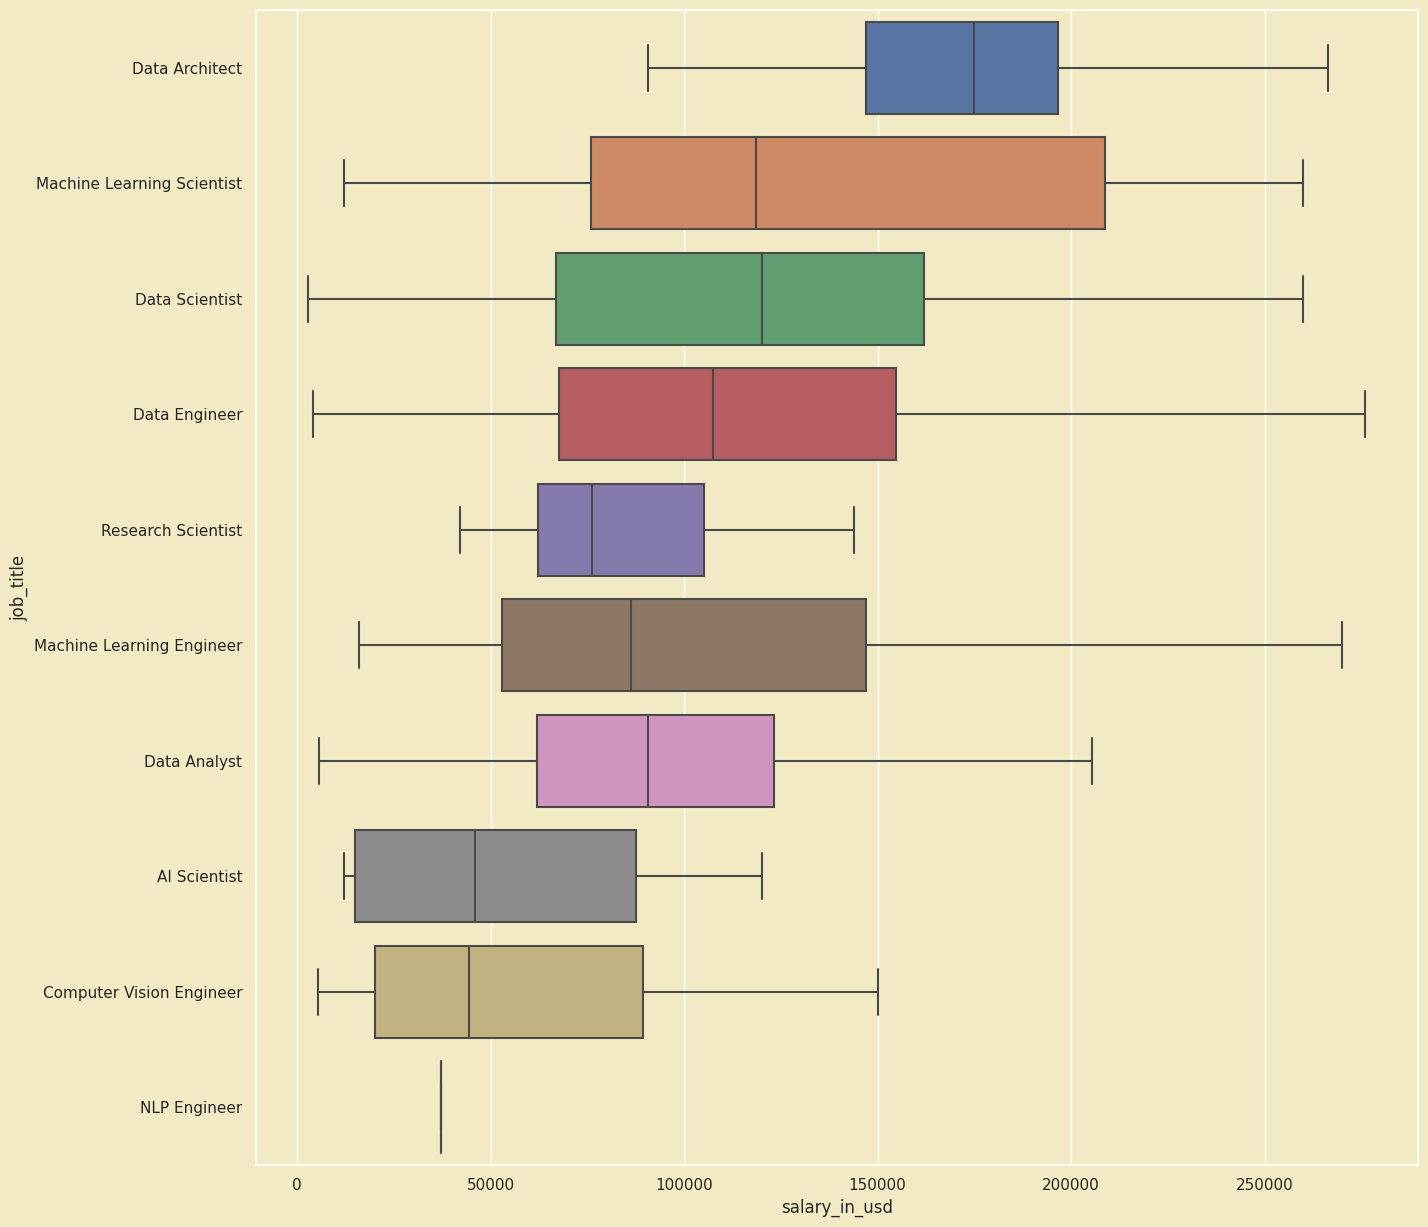

In [ ]:
plt.figure(figsize=(15,15))
order=salaries_df.groupby("job_title").salary_in_usd.mean().sort_values(ascending=False).index
sns.boxplot(y='job_title', x='salary_in_usd', data=salaries_df, showfliers=False,order=order)
plt.show()

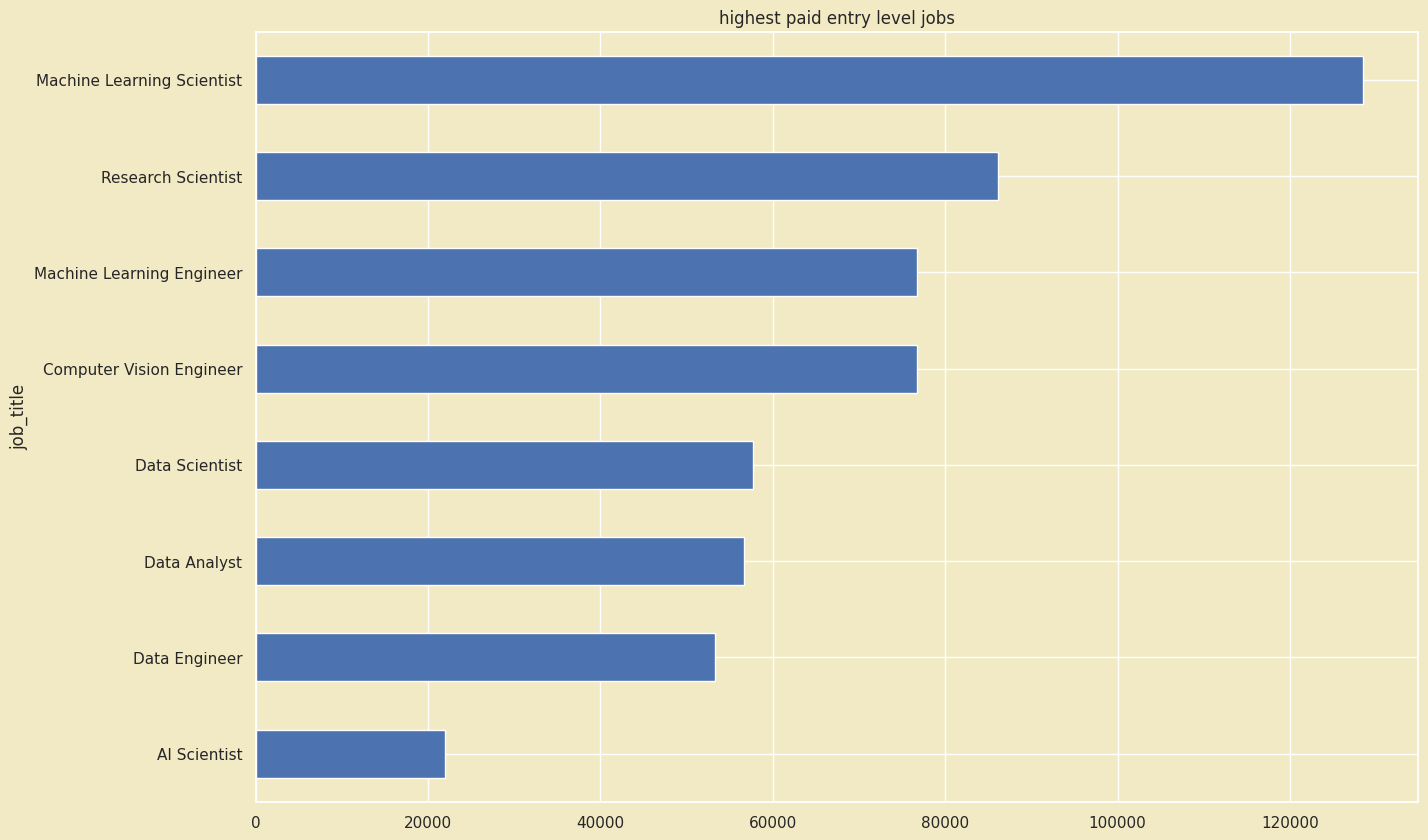

In [ ]:
plt.figure(figsize=(15,10))
salaries_df.groupby("experience_level").get_group("Entry-level / Junior").groupby("job_title").salary_in_usd.mean().sort_values().plot.barh()
plt.title('highest paid entry level jobs')
plt.show()

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object


<Axes: >

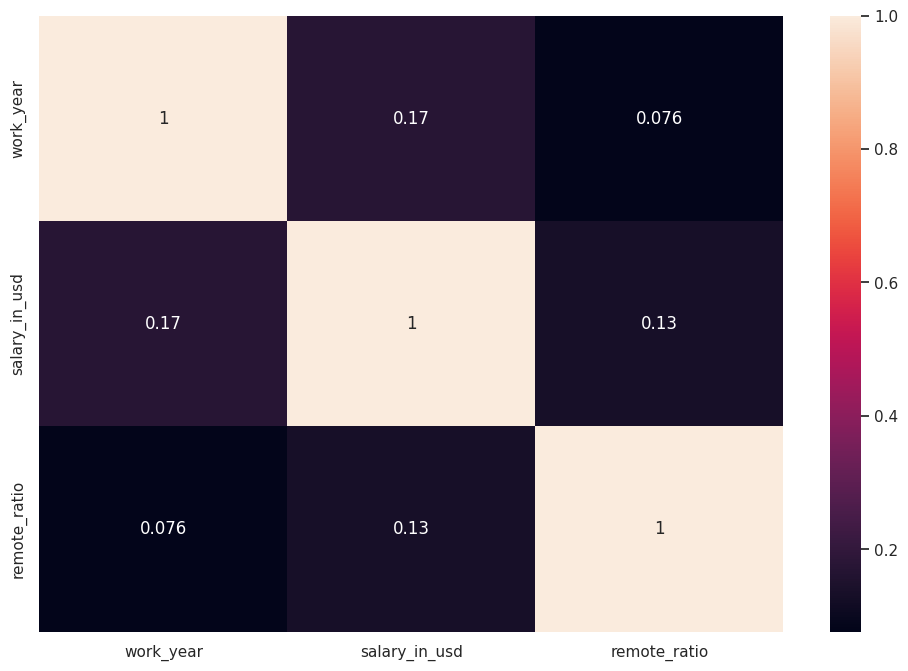

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv('ds_salaries.csv')
data=data.drop(columns=['Unnamed: 0','salary','salary_currency'])
data.head()
print(data.dtypes)
corr = data.corr()
sns.set(style='darkgrid')
%matplotlib inline
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True)

In [ ]:
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

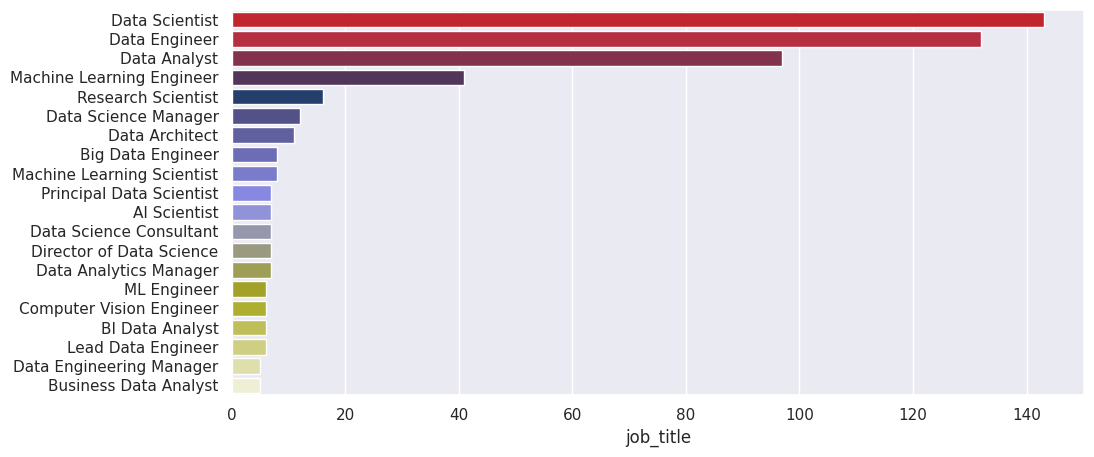

In [ ]:
popular=data["job_title"].value_counts()[:20].to_frame()

plt.figure(figsize=(11,5))
g=sns.barplot(y=popular.index,x=popular["job_title"],data=popular,palette="gist_stern")

plt.show()

Text(0.5, 1.0, 'Countries With Most Number Of Data Employee Residence')

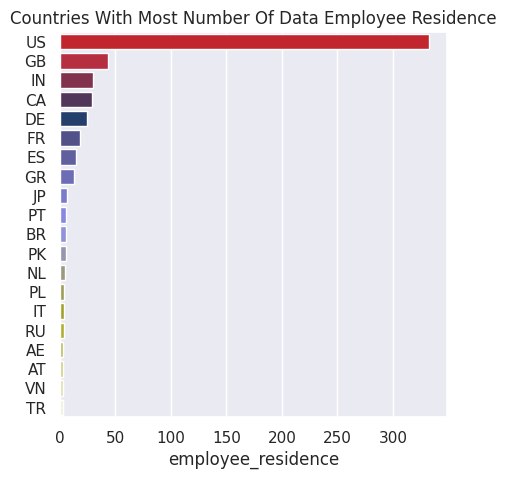

In [ ]:
emp=data["employee_residence"].value_counts()[:20].to_frame()

plt.figure(figsize=(11,5))
plt.subplot(1,2,1)
sns.barplot(y=emp.index,x=emp["employee_residence"],data=emp, palette="gist_stern")
plt.title("Countries With Most Number Of Data Employee Residence")

<function matplotlib.pyplot.show(close=None, block=None)>

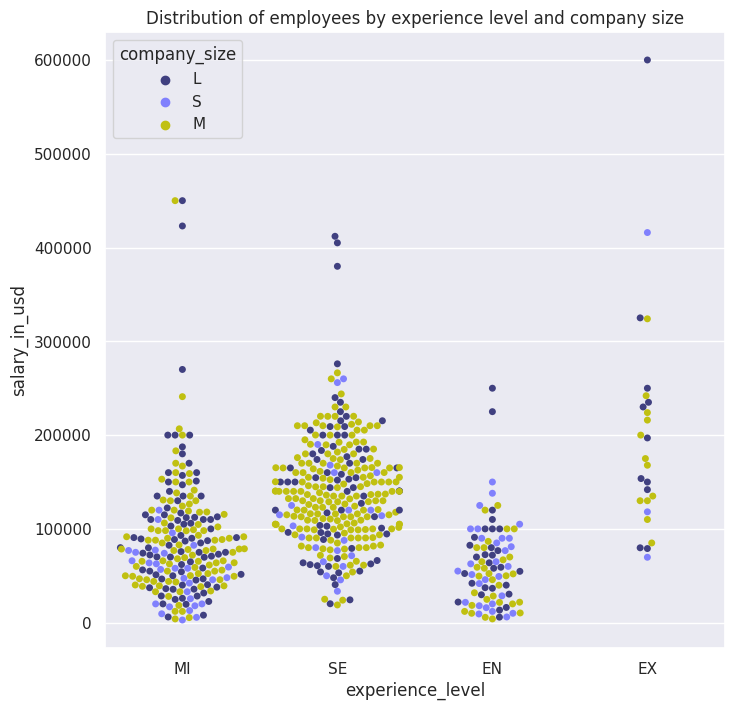

In [ ]:
plt.figure(figsize=(8,8))
sns.swarmplot(data=data,x=data['experience_level'],y=data['salary_in_usd'],hue=data['company_size'],palette="gist_stern")
plt.title("Distribution of employees by experience level and company size")
plt.show

In [ ]:
# top 10 data science roles according to mean salary
top_ds_roles = data.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)

# ignore those ds roles which occur only once
top_ds_roles_ =  pd.Series(data=list(top_ds_roles.index)).apply(lambda x: x if list(data['job_title']).count(x) > 1 else 0)
top_ds_roles_that_happened_gt_1 = top_ds_roles_[top_ds_roles_ != 0][:10]
top_ds_roles_that_happened_gt_1 = top_ds_roles[top_ds_roles_that_happened_gt_1]
top_ds_roles_that_happened_gt_1

job_title
Principal Data Engineer       328333.333333
Financial Data Analyst        275000.000000
Principal Data Scientist      215242.428571
Director of Data Science      195074.000000
Data Architect                177873.909091
Applied Data Scientist        175655.000000
Analytics Engineer            175000.000000
Head of Data                  160162.600000
Machine Learning Scientist    158412.500000
Data Science Manager          158328.500000
Name: salary_in_usd, dtype: float64

# Correlation

In [ ]:
salaries_df = pd.read_csv("ds_salaries.csv", index_col=0)

work_year = pd.DataFrame(salaries_df[['work_year']])
experience_level = pd.DataFrame(salaries_df[['experience_level']])
employment_type = pd.DataFrame(salaries_df[['employment_type']])
job_title = pd.DataFrame(salaries_df[['job_title']])
salary = pd.DataFrame(salaries_df[['salary_in_usd']])
employee_residence = pd.DataFrame(salaries_df[['employee_residence']])
remote_ratio = pd.DataFrame(salaries_df[['remote_ratio']])
company_location = pd.DataFrame(salaries_df[['company_location']])
company_size = pd.DataFrame(salaries_df[['company_size']])

In [ ]:
corr_matrix = salaries_df.corr()
corr_matrix

,work_year,salary,salary_in_usd,remote_ratio
work_year,1.000000,-0.087577,0.170493,0.076314
salary,-0.087577,1.000000,-0.083906,-0.014608
salary_in_usd,0.170493,-0.083906,1.000000,0.132122
remote_ratio,0.076314,-0.014608,0.132122,1.000000


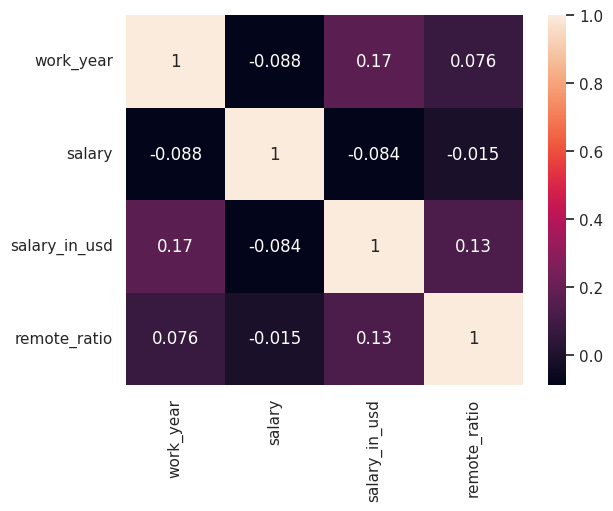

In [ ]:
sns.heatmap(corr_matrix, annot=True)
plt.show()

# Prediction


<Axes: ylabel='salary_in_usd'>

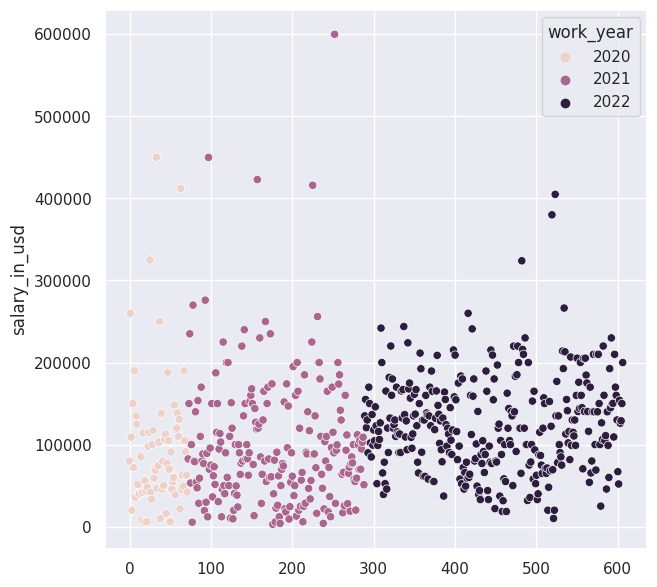

In [ ]:
f = plt.figure(figsize=(7,7))
sns.scatterplot(data=salaries_df, x=salaries_df.index, y='salary_in_usd', hue='work_year')

Goodness of Fit of Model 	Test Dataset
Mean Absolute Error: 4039.0853278688523
Root Mean Squared Error: 12116.939912939017
R-squared Score: 0.9616914330598377

Training R-squared: 0.9937438656418843
Testing R-squared: 0.9616914330598377


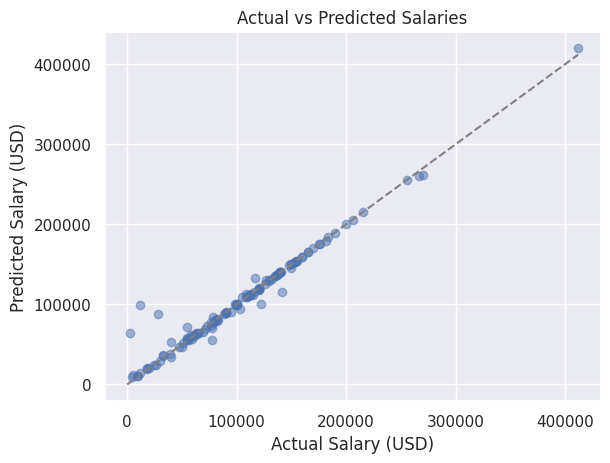

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_csv('ds_salaries.csv')

# Select the features and target
X = df.drop(['salary_in_usd'], axis=1) #all variable
y = df['salary_in_usd']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train the Random Forest Regressor
model = RandomForestRegressor(random_state=50)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model's performance
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error:", mean_squared_error(y_test, y_pred, squared=False))
print("R-squared Score:", r2_score(y_test, y_pred))
print()




y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)

# Predict on the testing set and calculate R-squared
y_test_pred = model.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)

print("Training R-squared:", r2_train)
print("Testing R-squared:", r2_test)

# Create a scatter plot of actual vs predicted salaries
plt.scatter(y_test, y_pred, alpha=0.5)

# Add a diagonal line to represent perfect predictions
plt.plot([0, max(y_test)], [0, max(y_test)], '--', color='grey')

# Set the axis labels and title
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.title('Actual vs Predicted Salaries')

# Show the plot
plt.show()


Mean Absolute Error (MAE) measures the average absolute difference between the predicted and actual values. The MAE value found means predicted salaries are off by around $4,039 from the actual salaries.

Root Mean Squared Error (RMSE) measures the square root of the average squared difference between the predicted and actual values. The RMSE value shows that, on average, the predicted salaries are off by around $12,116 from the actual salaries. 
(Since RMSE is more sensitive to outliers compared to MAE, it is generally higher than MAE)

R-squared score (R2) measures the proportion of the variance in the target variable that is explained by the model. The R2 value of 0.962 indicates that around 96.2% of the variance in the target variable (salary) is explained by the model. 
(A high R2 score suggests that the model is able to capture most of the important patterns in the data)

In [ ]:
# Get the feature importances
importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Importance'])
importances = importances.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(importances)



                                   Importance
salary                               0.718145
salary_currency_USD                  0.161375
employee_residence_US                0.073793
job_title_Principal Data Engineer    0.007662
salary_currency_CAD                  0.003128
...                                       ...
company_location_IE                  0.000000
employee_residence_HN                0.000000
job_title_Marketing Data Analyst     0.000000
company_location_KE                  0.000000
employee_residence_DZ                0.000000

[189 rows x 1 columns]


The top few rows are the most important in predicting our target variable. It is interesting to see that the target variable itself is not the most important.

# Experience level

## Experience Level and Employment Type

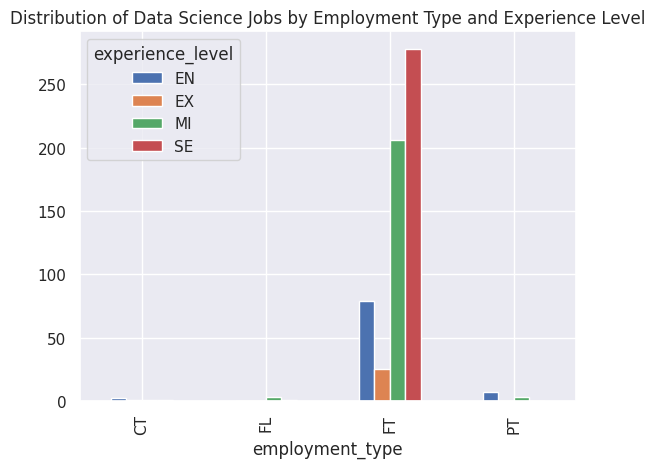

In [ ]:
CrosstabResult=pd.crosstab(index=salaries_df['employment_type'],columns=salaries_df['experience_level'])
CrosstabResult.plot(kind='bar')

# Add a title to the chart
plt.title('Distribution of Data Science Jobs by Employment Type and Experience Level')
plt.show()

## Experience level and Company Size


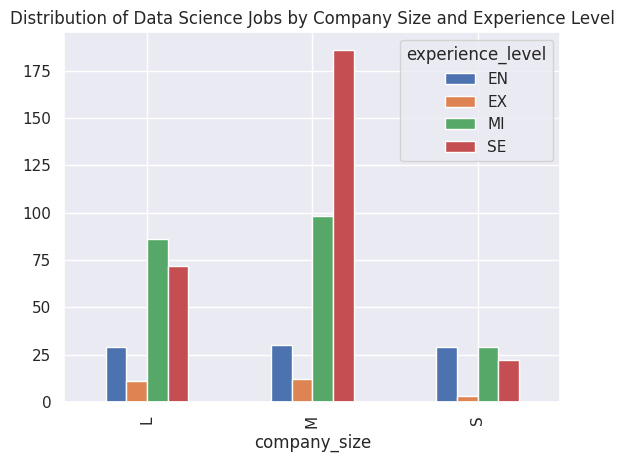

In [ ]:
CrosstabResult=pd.crosstab(index=salaries_df['company_size'],columns=salaries_df['experience_level'])
CrosstabResult.plot(kind='bar')

# Add a title to the chart
plt.title('Distribution of Data Science Jobs by Company Size and Experience Level')
plt.show()


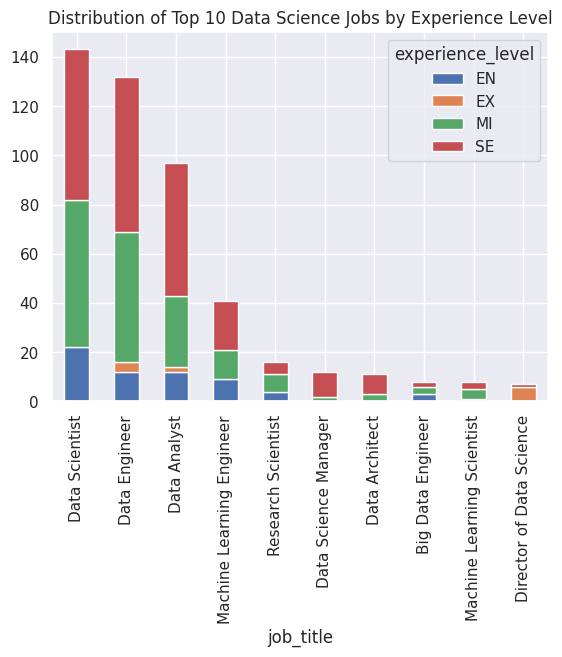

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Create a cross-tabulation of job_title and experience_level
crosstab_result = pd.crosstab(index=salaries_df['job_title'], columns=salaries_df['experience_level'])

# Sort the rows by the total count in descending order
crosstab_result = crosstab_result.loc[crosstab_result.sum(axis=1).sort_values(ascending=False).index]

# Select the top 10 rows
top_10 = crosstab_result.head(10)

# Create a stacked bar chart using matplotlib
top_10.plot(kind='bar', stacked=True)
# Add a title to the chart
plt.title('Distribution of Top 10 Data Science Jobs by Experience Level')

# Show the chart
plt.show()
